# Python 101 
## Part VIII.

---

## Web Scraping - Part II.

### Act I: Let's scrape!

But first, import the necessary libraries.

In [ ]:
import requests
from bs4 import BeautifulSoup

BASE_URI = './data/'

#### 1. Let's collect the articles about migrants from index.hu

This will require to search in the site.
On the upper-left corner, there is a search icon. Use it, and observe the resulting url:

`http://index.hu/24ora/?word=1&pepe=1&tol=1999-01-01&ig=2016-10-23&s=migráns`

It has multiple parts:
- `http://` - protocol
- `index.hu` - base url
- `/24ora/` - sub url
- `?word=1&pepe=1&tol=1999-01-01&ig=2016-10-23&s=migráns` - query

Let's investigate the query part a little more!  
Every query starts with a __`?`__ charater followed by one or more key-value pairs. The key-value pairs are separated with the __`&`__ character. Based on this information, we can extract the query parameters:
- `word`
- `pepe`
- `tol`
- `ig`
- `s`

Use these values to construct our own request:

In [ ]:
base_url = 'http://index.hu'
sub_url = '/24ora'
query = {
    'word': 1,
    'pepe': 1,
    'tol': '1999-01-01',
    'ig': '2016-10-23',
    's': u'migráns'
}

In [ ]:
migrant_articles = []
date = datetime.date(2016,9,23)  # start from last month to finish "quickly"
while date < datetime.date.today():
    query['tol'] = '{year}-{month:0>2}-{day:0>2}'.format(year=date.year, month=date.month, day=date.day)
    date += datetime.timedelta(days=1)
    query['ig'] = '{year}-{month:0>2}-{day:0>2}'.format(year=date.year, month=date.month, day=date.day)

    print 'Downloading', query['tol'], '-', query['ig'], '...',
    resp = requests.get(url=base_url+sub_url, data=query)
    if not resp.status_code == 200:
        print 'Download failed. ({})'.format(resp.status_code)
        continue
    print 'Done.'
    print 'Extracting articles...',
    soup = BeautifulSoup(resp.content, 'html.parser')
    articles = soup.findAll('article', {'class': 'rovatajanlo'})
    print 'Found {} articles.'.format(len(articles))
    print 'Processing...',
    for article in articles:
        migrant_articles.append(article.find('a').get('href'))
    print 'Done.'
    print '-' * 80

In [ ]:
len(migrant_articles)

We can use the requests library to send the query:

In [ ]:
resp = requests.get(url=base_url+sub_url, data=query)
resp

Using the response, extract the articles' urls!

You can see that only 30 results showed up. We can customize our query to cover shorter amount of timed by replacing __`tol`__ and __`ig`__ parameters with a formattable string: __`'{year}-{month:0>2}-{day:0>2}'`__. This string can be formatted by providing the required parameters:
- year
- month
- day

like this:

In [ ]:
'{year}-{month:0>2}-{day:0>2}'.format(year=2016, month=1, day=1)

There is a useful library called __`datetime`__. You can use it to generate dates automatically.

In [ ]:
import datetime

date = datetime.date(1999, 1, 1)
day_after_date = date + datetime.timedelta(days=1)
day_before_date = date - datetime.timedelta(days=1)
today = datetime.date.today()

print day_before_date
print date
print day_after_date
print today

print today.year, today.month, today.day

Create a loop which iterate through every day from 1999-01-01 till today and execute the same procedure you created previously. (Pro tip: create a function!) Observe the number of results!

#### 2. Let's do the same with 444.hu!

__Hint__: To find all query parameters, scroll down to the end of the page.

#### 3. Check out discounts on humblebundle.com!

List the names, prices and discount values for the top 100 games list (based on metacritic scores: http://www.metacritic.com/browse/games/score/metascore/all/pc/filtered)!

Extra questions:  
- How much does it cost to buy every (available) games from humblebundle?
- How much money do I save if I buy them right now?
- How much money do I save if we compare their price to their initial price? (Let's assume that every game initial price was \$60) 

#### 4. Functionize!

##### a. Create a function to check a game's price

In [ ]:
def check_price(game):
    pass

##### b. Create a function to get the top100 games

In [ ]:
def get_top100():
    pass

##### c. Write a function with the same functionality as the 3rd excersise!

In [ ]:
def main():
    pass

---

### Intermission: Creating a standalone script

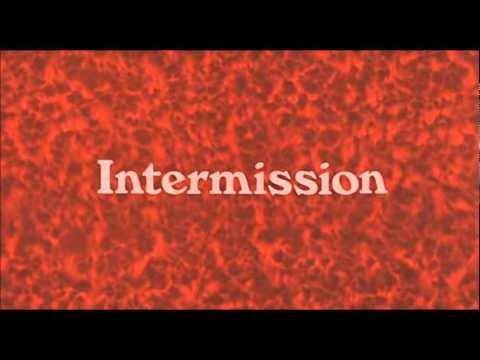

In [61]:
from IPython.display import YouTubeVideo
YouTubeVideo('O0wOD9TWynM')

Create a new text file with .py extension! You can specify the filename.
Start it with:  
    `# encoding: utf-8`  
then copy-paste:
    - the imports, 
    - the global variables 
    - the three functions
and insert the following two lines into the end of the file:  
`if __name__ == '__main__':  
     main()`  
Save it, and now you can execute this script by invoking:  
    __`python your_specified_filename.py`__


You can even:
- import your newly created script:

In [ ]:
import myscript # use your filename

- get it's contents

In [ ]:
dir(myscript)

- print its variables

In [ ]:
print myscript.base_url, myscript.sub_url, myscript.query

- use its functions

In [ ]:
hl2 = myscript.check_price('half-life 2')
print hl2

In [ ]:
myscript.get_top100()

---

### Act II: Disguise yourself!

Let's pretend to be a browser instead of a script

In [ ]:
USER_AGENTS = [
    # Chrome
    'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1667.0 Safari/537.36',
    # Firefox
    'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25.0) Gecko/20100101 Firefox/25.0',
    # Opera
    'Opera/9.80 (Windows NT 6.0) Presto/2.12.388 Version/12.14',
    # Safari
    'Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25',
    # Internet Explorer, probably a good idea to leave this one out...
    'Mozilla/5.0 (compatible; MSIE 10.6; Windows NT 6.1; Trident/5.0; InfoPath.2; SLCC1; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729; .NET CLR 2.0.50727) 3gpp-gba UNTRUSTED/1.0',
]

Let's write a wrapper function to handle the user-agent string.

In [ ]:
import random
def get_header(agents):
    return {'User-agent': random.choice(agents)}

#### Get the main articles from index.hu
Write a function that prints that extracts the current main articles! It should contain:
- the title
- the article text
- the url
- every picture from the article

In [ ]:
url = 'http://index.hu'
index_response = requests.get(url, headers=get_header(USER_AGENTS))

---

## Let's do some...

<img align="left" width=150 src="http://www.reactiongifs.com/r/mgc.gif">

### Act III: Cool library of the week: 
#### Something really awesome
- Install it

## Final Act:  It's your turn - write the missing code snippets!

Write a script called `youtube.py`, in which you create an object called RelatedTube.
It has an attribute: `base_url` (youtube's base url)
It has three functions: `init`, `get`, and `set`

Init:
    - Arguments: (`self` and) `youtube_video_id`
    - Output: -
    - Workflow: set the `self.video` to `youtube_video_id`
Get:
    - Arguments: `self`
    - Output: the links to the related videos
    - Workflow: 
        * get the `self.video` page
        * parse it for the related links
        * return them in a list
Set:
    - Arguments: (`self` and) `youtube_video_id`
    - Output: -
    - Workflow: set the `self.video` to `youtube_video_id`
Don't forget to hide your a**!!!

In [ ]:
# test the script
import youtube

In [ ]:
related = youtube.RelatedTube('zkxqRthhwIs')

In [ ]:
for video in related.get():
    print video